# Report for Project 1 Udacity Deep Reinforcement Learning Nanodegree - Navigation

**Fairoza Amira Binti Hamzah**

---

This report describes the solution for Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

Import necessary packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Start the environment.**

In [2]:
env = UnityEnvironment(file_name=".\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print("brain_name:", brain_name)
print("brain: ", brain)

brain_name: BananaBrain
brain:  Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Train the environment by using deep Q learning

In [8]:
from dqn_agent import Agent

agent = Agent(state_size, action_size,seed=0)

def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.02, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    N=100                            # Contains size of scoring window
    scores = []                      # list containing scores from each episode
    scores_window = deque(maxlen=N)  # last 100 scores
    eps = eps_start                  # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while True:            
            action = int(agent.act(state, eps))                 # agent takes action
            #action = np.random.randint(action_size)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # update agent with experience tuple
            state = next_state                             # update state
            score += reward                                # update total score
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        # Print Score while training
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % N == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        # Stop when required average score of 13 (+ a little extra buffer) is reached
        if np.mean(scores_window) >= 13.:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-N, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model_weights.pth') #save the weights
            break
    return scores

scores = dqn()

Episode 100	Average Score: 1.80
Episode 200	Average Score: 6.69
Episode 300	Average Score: 10.31
Episode 400	Average Score: 12.68
Episode 424	Average Score: 13.03
Environment solved in 324 episodes!	Average Score: 13.03


### Plot the result

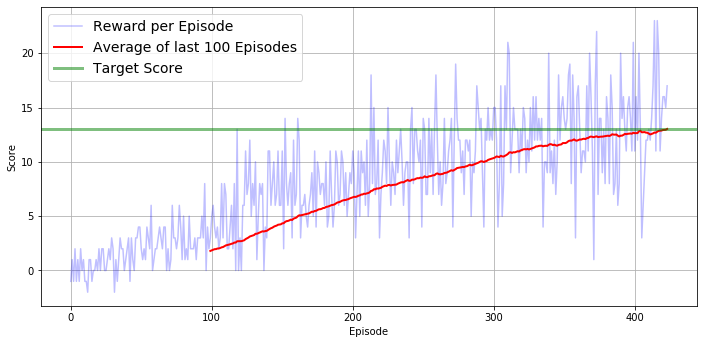

In [9]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})

scores_rolling = pd.Series(scores).rolling(100).mean()
ax.plot(scores, "-", c="blue", alpha=0.25)
ax.plot(scores_rolling, "-", c="red", linewidth=2)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(which="major")
ax.axhline(13, c="green", linewidth=3, alpha=0.5)
ax.legend(["Reward per Episode", "Average of last 100 Episodes", "Target Score"])

fig.tight_layout()
fig.savefig("plot.jpg")

### Close the environment

In [10]:
env.close()

## Results and Discussion

In a Reinforcement Learning (RL) setting, we can choose from Monte Carlo and Temporal-Difference methods. Monte-Carlo requires an agent to run the whole episode before making any decisions, this solution is no longer suitable with continuous tasks that does noth have any terminal state. The Temporal Difference (TD) Control methods update estimates based in part on other learned estimates, without waiting for the final outcome. TD will update the Q-table after every time steps. The Q-table is used to approximate the action-value function, $q_\pi$ for the policy $\pi$.

A fully-connected neural network (deep reinforcement learning) is used to solve the problem of navigation which has the vector observation space size of 37 and vector action space size of 4. 3 hidden layers are used for in this experiment as follows.

Input (state size) = 37
3 dense layers
Output (action size) = 4

This experiment use the deep Q-learning model. This model alone has been found unstable when neural networks are used to represent the action values. 
By keeping track of a replay buffer and use experience replay to sample for the buffer at random, the action values can be prevented for oscillating or diverging catastrophically. 

In this experiment, a buffer size of 50000 and 500000 are used, which means up to 50000 and 500000 experience tuples are stored at a time. 

The agent is trained using $\epsilon$-greedy policy with $\epsilon$ annealed exponentially from 0.1 to 0.01, 0.02 or 0.03, with a decay of 0.995, 0.98, or 0.95 for every episode.

### Results of the experiments are as below.

1. fc= 128, buffer size = 50000, learning rate = 0.00005, eps decay = 0.995, eps start from 0.1 to 0.01

<img src="fc128_bf1e5lr5e-5eps0.995.jpg">

2. fc= 64, buffer size = 500000, learning rate = 0.000025, eps decay = 0.995, eps start from 0.1 to 0.01

<img src= "fc64_bf1e6_lr25e-5eps0.995.jpg">

3. fc= 64, buffer size = 50000, learning rate = 0.00005, eps decay = 0.95, eps start from 0.1 to 0.02

<img src = "fc64_bf1e5_lr5e-5_eps0.95.jpg">

4. fc= 64, buffer size = 50000, learning rate = 0.00005, eps decay = 0.99, eps start from 0.1 to 0.02

<img src = "fc64_bf1e5_lr5e-5_eps0.990.02.jpg">

5. fc= 64, buffer size = 50000, learning rate = 0.00005, eps decay = 0.99, eps start from 0.1 to 0.01

<img src = "fc64_bf1e5lr5e-5eps0.99.jpg">

6. fc= 64, buffer size = 50000, learning rate = 0.00005, eps decay = 0.95, eps start from 0.1 to 0.03

<img src = "fc64_bg1e5lr5e-5eps0.95.jpg">

7. fc= 64, buffer size = 50000, learning rate = 0.00005, eps decay = 0.98, eps start from 0.1 to 0.02

<img src="fc64bf1e5lr5e-5eps0.98.jpg">

### Conclusion

The agent get an average of +13 reward after around 250 to 450 episodes.

### Further improvement

Improve by using prioritized experience replay. 
Try the visual version of the environment.
Implement and experiment with the double Q learning, dueling Q learning or rainbow.
